In [29]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import os

In [30]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='../input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='../input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [31]:
#Normalize
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [32]:
#create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='elu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Flatten())
model.add(Dense(128,activation='elu'))
model.add(Dropout(0.15))
model.add(Dense(64,activation='elu'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 70s 110ms/step - loss: 1.5492 - accuracy: 0.5491 - val_loss: 0.6481 - val_accuracy: 0.6100
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6418 - accuracy: 0.6364 - val_loss: 0.5725 - val_accuracy: 0.7050
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5494 - accuracy: 0.7242 - val_loss: 0.5345 - val_accuracy: 0.7322
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4832 - accuracy: 0.7635 - val_loss: 0.4978 - val_accuracy: 0.7540
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4197 - accuracy: 0.8096 - val_loss: 0.4592 - val_accuracy: 0.7818
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3601 - accuracy: 0.8399 - val_loss: 0.4367 - val_accuracy: 0.7982
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2862 - accuracy: 0.8777 - val_loss: 0.4369 - val_ac

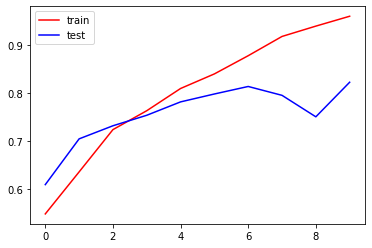

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

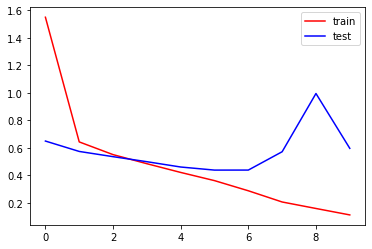

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()